In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\write\AppData\Local\Temp\ipykernel_11536\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [6]:
# train test split
X = df.iloc[:,1:3]
y = df.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
X_train.shape, X_test.shape

((801, 2), (90, 2))

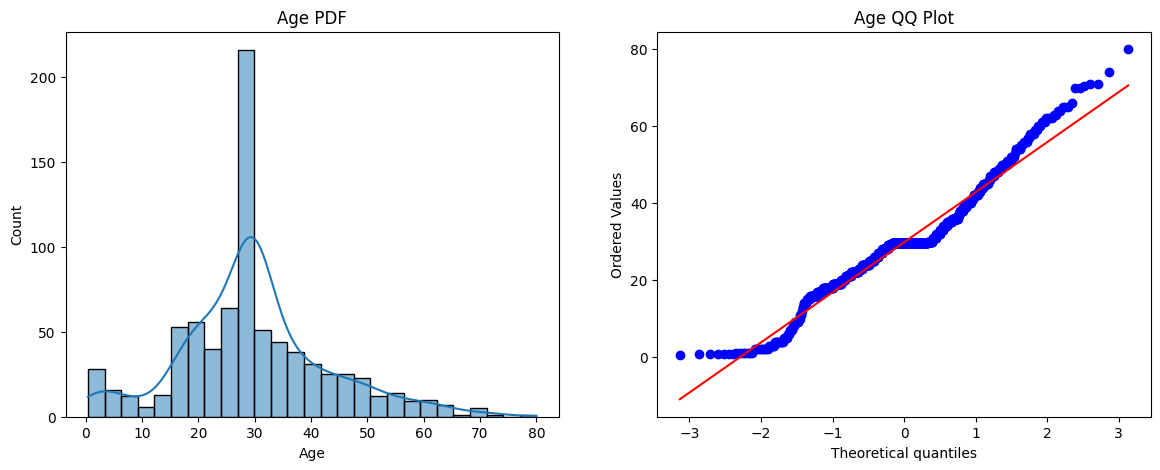

In [7]:
# age PDF Vs age QQ Plot
plt.figure(figsize=(14, 5))

# Plot Age PDF
plt.subplot(1,2,1)
sns.histplot(X_train['Age'], kde=True)  # Using histplot instead of distplot
plt.title('Age PDF')

# Plot Age QQ Plot
plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()


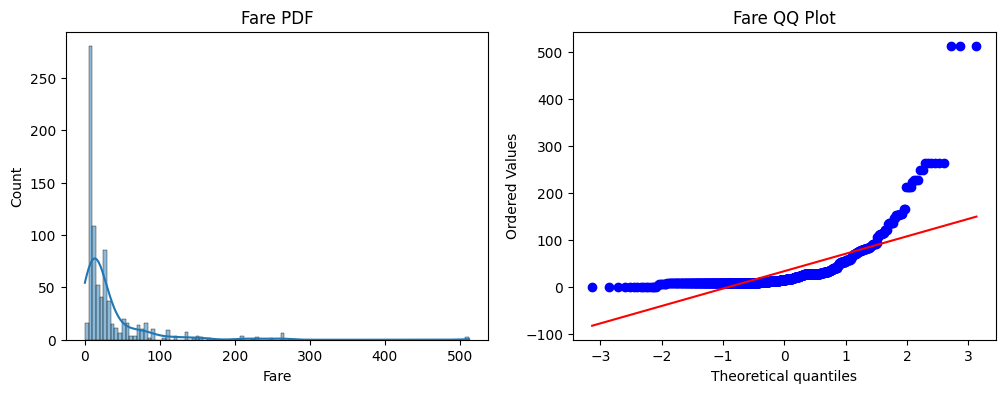

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [9]:
# training model without using function transformation
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [10]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(f"Accuracy score of LR: {accuracy_score(y_test, y_pred1)}")
print(f"Accuracy score DTC: {accuracy_score(y_test, y_pred2)}")

Accuracy score of LR: 0.6777777777777778
Accuracy score DTC: 0.6555555555555556


In [12]:
# now using function transformation before training our model

trf = FunctionTransformer(func=np.log1p) # this is built-in function, but can also use custom function

In [13]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [14]:
# training the model

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f'Accuracy Score of LR: {accuracy_score(y_test, y_pred1)}')
print(f'Accuracy Score of DTR: {accuracy_score(y_test, y_pred2)}')

Accuracy Score of LR: 0.6666666666666666
Accuracy Score of DTR: 0.6666666666666666


C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# here we can observe that Decision Tree accuracy not musch affected but some time it dosent even affet this because Decision Tree not depend on function transformer
# but Logistic Regression and other linear algorithm gives better result by using function transformation, like here Logistic transformation gives better accuracy

In [16]:
# using calculating cross validation score 
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(clf1, X_transformed, y, scoring='accuracy', cv=10)))
print("DTC: ", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))


LR:  0.678027465667915
DTC:  0.6633333333333333


C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\write\Desktop\ai\AI-Development\ML\virtual_env\Lib\site-packages\sklearn\utils\validation.py:1339: D

# Comparision before and after function transformation

Text(0.5, 1.0, 'Fare After Log')

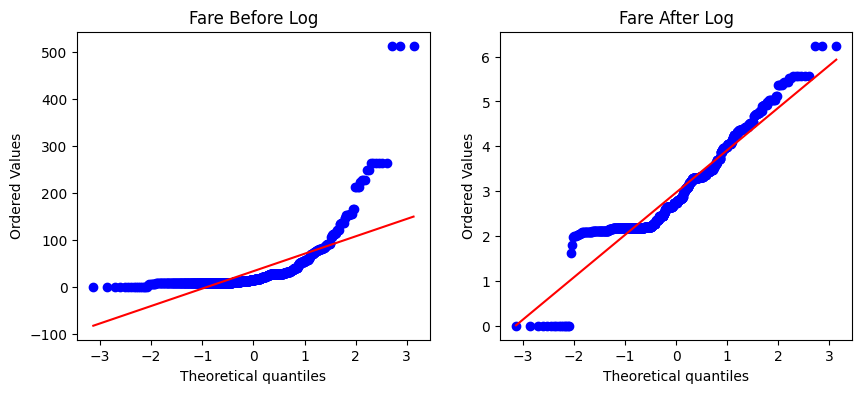

In [17]:
# Fare comparision
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

Text(0.5, 1.0, 'Age After Log')

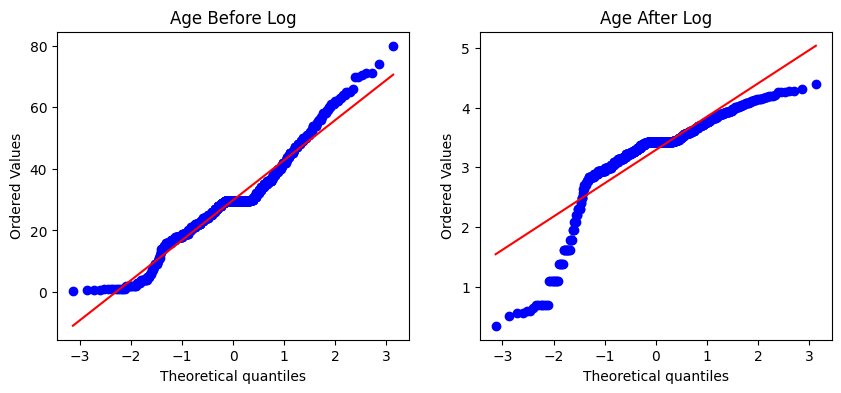

In [18]:
# now comparing age
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')


In [19]:
# here function transformation makes it more worst, so be sure which function of function transformation you are using, and check it by applying which one gives better result

In [20]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare']),
    ], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print('Accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(1,2,2)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

Accuracy 0.39843945068664166


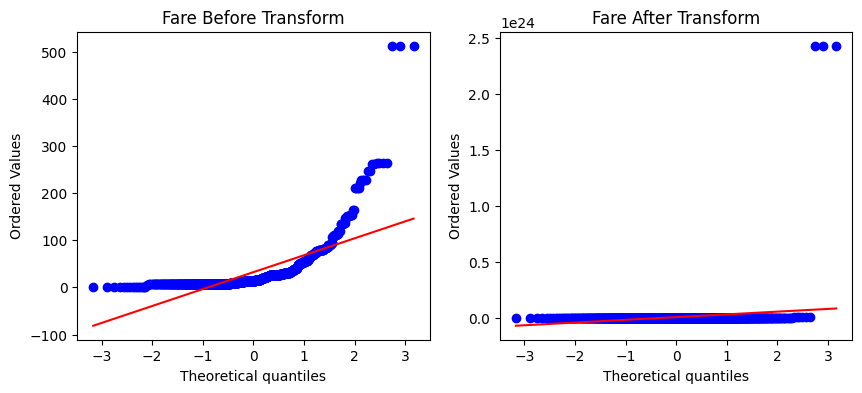

In [21]:
apply_transform(lambda x: x**9) # here we can pass any formula to check its performance